# EDA on features

In [12]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder  

import xgboost as xgb
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Examine last_review and host_since

In [14]:
train[['last_review', 'price']]

,last_review,price
0,5/12/20,2
1,7/1/19,1
2,11/23/19,3
3,11/1/19,2
4,12/26/19,3
5,3/16/20,1
6,7/15/19,1
7,5/30/19,2
8,7/19/18,4
9,6/20/20,1


In [16]:
train.last_review = train.last_review.apply(lambda x: x[-2:])

Text(0.5, 0, 'last_review')

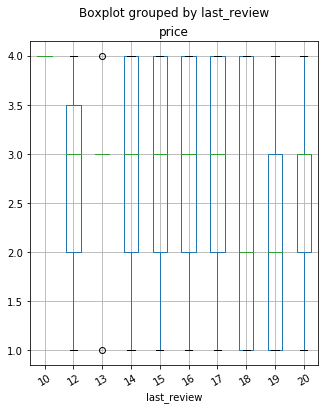

In [19]:
train.boxplot('price', 'last_review', rot = 30, figsize=(5,6))
plt.xlabel('last_review')

In [20]:
train[['host_since', 'price']]

,host_since,price
0,8/1/13,2
1,2/14/14,1
2,10/19/17,3
3,2/1/19,2
4,1/24/15,3
5,5/17/16,1
6,9/16/14,1
7,6/10/12,2
8,5/23/16,4
9,1/24/18,1


Text(0.5, 0, 'host_since')

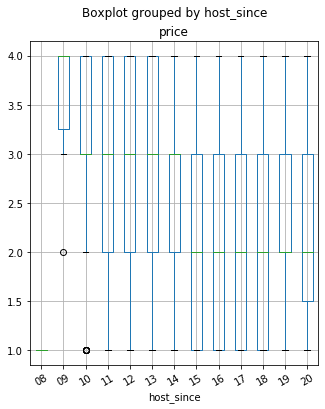

In [21]:
train.host_since = train.host_since.apply(lambda x: x[-2:])
train.boxplot('price', 'host_since', rot = 30, figsize=(5,6))
plt.xlabel('host_since')

In [3]:
train = train.drop(['id','last_review','host_since'],axis=1)

In [123]:
factor_feature = train.columns[train.dtypes==object]
factor_feature
quant_feature = train.columns[train.dtypes!=object]
quant_feature

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'bathrooms',
       'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_nights', 'price'],
      dtype='object')

#### Looks like 'bed_type', 'require_guest_profile_picture' and 'require_guest_phone_verification' are not important for price classification since most rooms have same properties.

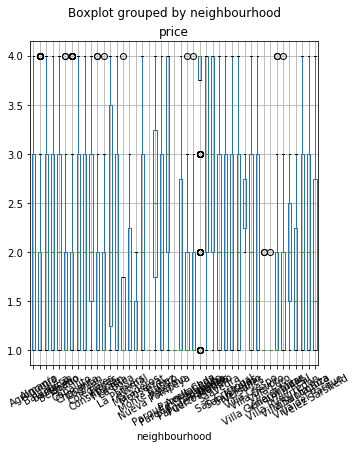

neighbourhood


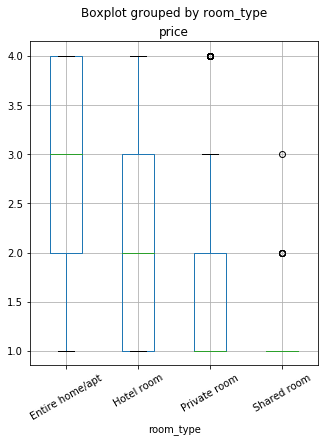

room_type


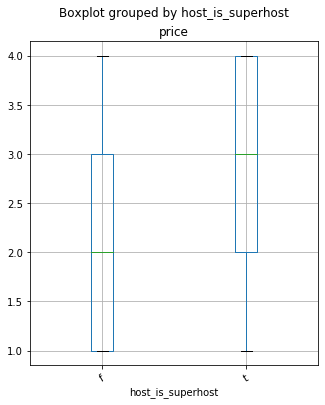

host_is_superhost


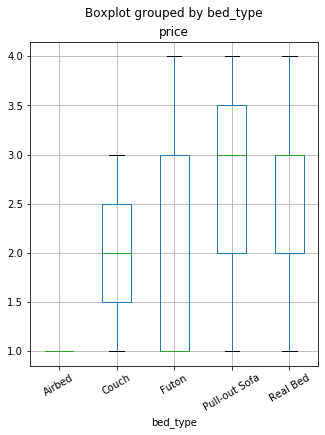

bed_type


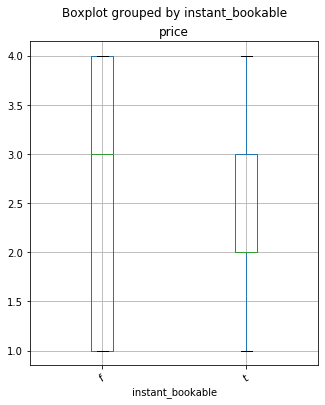

instant_bookable


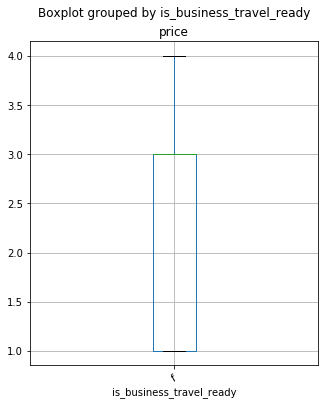

is_business_travel_ready


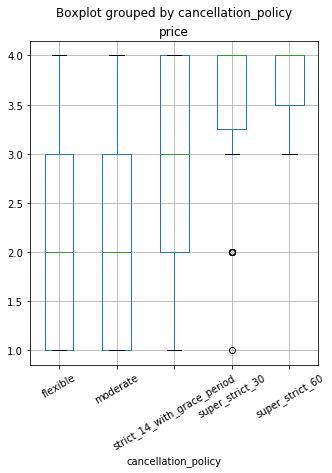

cancellation_policy


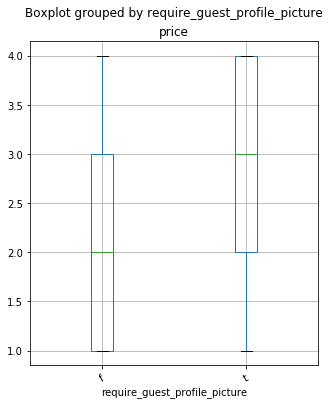

require_guest_profile_picture


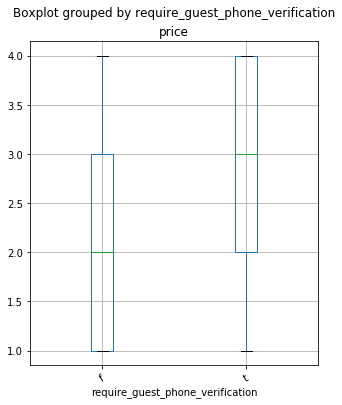

require_guest_phone_verification


In [117]:
for col in train[factor_feature].columns:
#     train[col].value_counts().plot();
    train.boxplot('price', col, rot = 30,figsize=(5,6))
    plt.xlabel(col)
    plt.show()
    print(col)

In [118]:
train.groupby('require_guest_profile_picture')['price'].value_counts()

require_guest_profile_picture  price
f                              1        2388
                               3        2385
                               2        2380
                               4        2301
t                              3          81
                               4          77
                               2          36
                               1          33
Name: price, dtype: int64

In [119]:
train.groupby('require_guest_phone_verification')['price'].value_counts()

require_guest_phone_verification  price
f                                 3        2394
                                  1        2392
                                  2        2388
                                  4        2319
t                                 3          72
                                  4          59
                                  1          29
                                  2          28
Name: price, dtype: int64

In [110]:
train.groupby('bed_type')['price'].value_counts()

bed_type  price
0         2        2455
          0        2408
          1        2407
          3        2371
1         1           7
          2           3
          0           1
          3           1
2         2           7
          0           6
          3           6
          1           4
3         0           1
          1           1
          2           1
4         1           2
Name: price, dtype: int64

### use random forest for feature selection.

In [136]:
train = train.apply(lambda x: pd.factorize(x)[0])

In [137]:
df_train, df_test = train_test_split(train, test_size=0.2)

In [138]:
X1, X2, y1, y2=df_train.drop('price', axis=1).copy(), df_test.drop('price', axis=1).copy(), df_train['price'], df_test['price']

In [139]:
clf = RandomForestClassifier(oob_score=True)
clf.fit(X1, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
print('train/test accuracy:{}/{}'.format(sum(clf.predict(X1)==y1)/len(y1), sum(clf.predict(X2)==y2)/len(y2)))

train/test accuracy:1.0/0.5049044914816727


In [129]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

important_feature = []
threshold = 0.01

for f in range(X1.shape[1]):
    print('{} {}: {}'.format(f + 1, X1.columns[indices[f]], importances[indices[f]]))
    if importances[indices[f]]>= threshold:
        important_feature.append(X1.columns[indices[f]])

Feature ranking:
1 reviews_per_month: 0.1039238450803061
2 cleaning_fee: 0.10060590033382107
3 availability_365: 0.09198663941316859
4 number_of_reviews: 0.0911616375236755
5 neighbourhood: 0.07280271908011572
6 maximum_nights: 0.06334023041504162
7 minimum_nights: 0.06293483967521905
8 bedrooms: 0.05930762046737114
9 calculated_host_listings_count: 0.057826169097488576
10 room_type: 0.056531395987200916
11 extra_people: 0.047839435739004024
12 beds: 0.04111889470166161
13 bathrooms: 0.038022883104069864
14 cancellation_policy: 0.03574678836985636
15 guests_included: 0.0288128253495019
16 instant_bookable: 0.02128780417599314
17 host_is_superhost: 0.0190603514815083
18 require_guest_profile_picture: 0.00341733770696504
19 require_guest_phone_verification: 0.0029689712095833636
20 bed_type: 0.00130371108844813
21 is_business_travel_ready: 0.0


### Let's consider only features with importance greater than 0.05.

In [130]:
important_feature

['reviews_per_month',
 'cleaning_fee',
 'availability_365',
 'number_of_reviews',
 'neighbourhood',
 'maximum_nights',
 'minimum_nights',
 'bedrooms',
 'calculated_host_listings_count',
 'room_type',
 'extra_people',
 'beds',
 'bathrooms',
 'cancellation_policy',
 'guests_included',
 'instant_bookable',
 'host_is_superhost']

In [131]:
X1_selected = X1[important_feature]
X2_selected = X2[important_feature]

In [132]:
clf = RandomForestClassifier(oob_score=True)
clf.fit(X1_selected, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
print('train/test accuracy:{}/{}'.format(sum(clf.predict(X1_selected)==y1)/len(y1), sum(clf.predict(X2_selected)==y2)/len(y2)))

train/test accuracy:1.0/0.5054207537429014


### Not really improve anything, if we use all the features MLR will be slightly below 0.5 acc.

## Plots for each feature against price